### Valence and Arousal in FB posts:
- link to the paper: https://wwbp.org/papers/va16wassa.pdf
- the authors ran L2 regularization for linear regression and did 10 CVs
- bag of words approach
- and they compared the result with other lexicons. It seemsl like other lexicons are not doing better because most of those were trained and tested on the same dataset. 


### I'm curious about...
- how it perfoms with other models
- the most frequent words for both valence and arousal are pretty common-sensed. I'm wondering if I can get a better result by using n-grams > 1 / comparing with TfiDF / using text-to-speech aPI to increase the accuracy of arousal

### First, I'm going to duplicate the research's approach, then compare to my own approach

In [3]:
from scrapy.selector import Selector
from scrapy.http import HtmlResponse
import json
import urllib
import pandas as pd
import numpy as np
import requests
import json
import re
import matplotlib.pyplot as plt
import urllib2
%matplotlib inline

In [4]:
fb = pd.read_csv("/Users/KerryChowChow/capstone/datasets/emotion dataset/FB_sentiment_intensity/dataset-fb-valence-arousal-anon.csv")

In [5]:
fb.head()

,Anonymized Message,Valence1,Valence2,Arousal1,Arousal2
0,We'll be off and running to a lil' place calle...,9,9,8,8
1,I really wana move soon!,4,5,5,7
2,thinking at charity cup,5,5,1,1
3,"thinks that for girls, boys are easily found. ...",4,3,6,7
4,Our Wedding Anniversary tonight...,7,7,4,5


In [6]:
messages = fb.iloc[:,0]

In [7]:
fb.describe()
#comparing the results of two annotators. It seems like measuring intensity is 

,Valence1,Valence2,Arousal1,Arousal2
count,2895.000000,2895.000000,2895.000000,2895.000000
mean,5.274266,5.250432,3.363731,3.342314
std,1.042005,1.485409,1.958448,2.183826
min,2.000000,1.000000,1.000000,1.000000
25%,5.000000,5.000000,2.000000,1.000000
50%,5.000000,5.000000,3.000000,3.000000
75%,6.000000,6.000000,5.000000,5.000000
max,9.000000,9.000000,9.000000,9.000000


In [9]:
### Graphing
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('fivethirtyeight')

# Plot within the jupyter notebook
%matplotlib inline
# Basically, the HD version
%config InlineBackend.figure_format = 'retina'

# Create a figure size
fig = plt.figure(figsize=(7,7))


//anaconda/envs/dsi/lib/python2.7/site-packages/seaborn/categorical.py:2171: UserWarning: The boxplot API has been changed. Attempting to adjust your arguments for the new API (which might not work). Please update your code. See the version 0.6 release notes for more info.
  warnings.warn(msg, UserWarning)


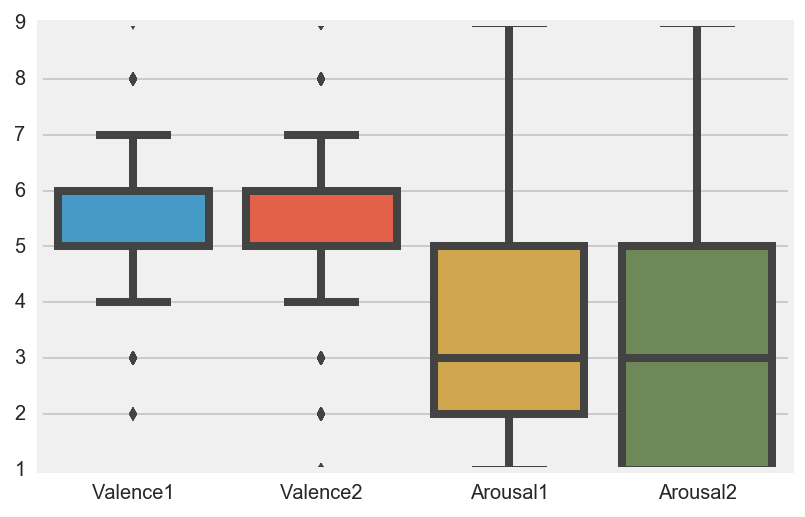

In [10]:
sns.boxplot(fb)
fig = plt.figure(figsize=(13,9))

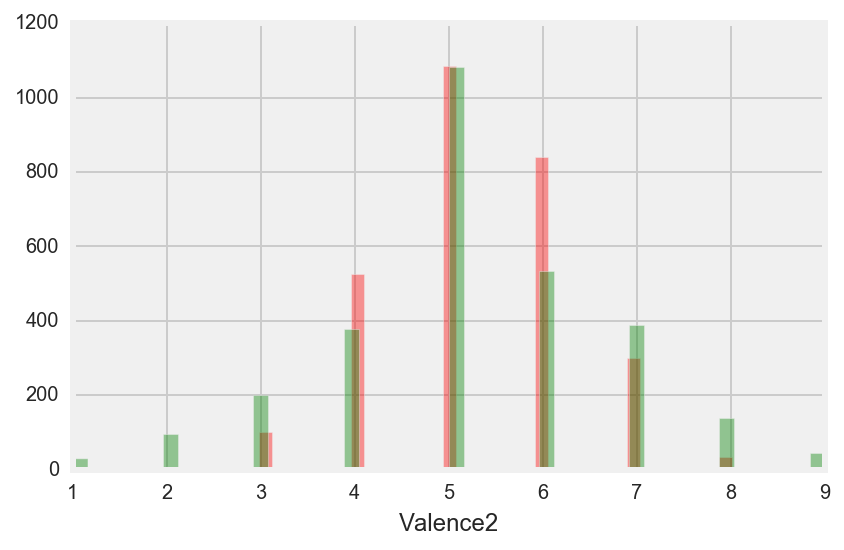

In [11]:
sns.distplot(fb.Valence1, kde = False, color = 'r', label = "valence1")
sns.distplot(fb.Valence2, kde = False, color = 'g', label = "valence2")

#annotator2 tends to distribure valence ratings more evenly
#annotator1 tends to rate more 'neutral' emotions

## question: should I make an average or only pick the wider range one?
### --> going to try average here

In [12]:
fb.head(2)

,Anonymized Message,Valence1,Valence2,Arousal1,Arousal2
0,We'll be off and running to a lil' place calle...,9,9,8,8
1,I really wana move soon!,4,5,5,7


In [13]:
fb['Valence']=(fb.Valence1 + fb.Valence2)/2

In [14]:
fb['Arousal']= (fb.Arousal1 + fb.Arousal2)/2

In [15]:
fb.head(2)

,Anonymized Message,Valence1,Valence2,Arousal1,Arousal2,Valence,Arousal
0,We'll be off and running to a lil' place calle...,9,9,8,8,9.0,8.0
1,I really wana move soon!,4,5,5,7,4.5,6.0


In [16]:
from sklearn.feature_extraction.text import CountVectorizer

In [17]:
vect = CountVectorizer(stop_words='english')

In [18]:
fb.info()
#seems like there's one null value under Message

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2895 entries, 0 to 2894
Data columns (total 7 columns):
Anonymized Message    2894 non-null object
Valence1              2895 non-null int64
Valence2              2895 non-null int64
Arousal1              2895 non-null int64
Arousal2              2895 non-null int64
Valence               2895 non-null float64
Arousal               2895 non-null float64
dtypes: float64(2), int64(4), object(1)
memory usage: 158.4+ KB


In [19]:
fb[fb['Anonymized Message'].isnull()]

,Anonymized Message,Valence1,Valence2,Arousal1,Arousal2,Valence,Arousal
70,NaN,6,6,3,1,6.0,2.0


In [20]:
fb.dropna(inplace=True)

In [21]:
messages = fb['Anonymized Message']

In [22]:
import numpy as np

In [23]:
X = vect.fit_transform(messages)

In [24]:
test1 = pd.DataFrame(X.todense(), columns=vect.get_feature_names())

In [25]:
len(vect.vocabulary_)

6647

In [26]:
X.shape

(2894, 6647)

In [27]:
df  = pd.DataFrame(vect.transform(messages).todense(),
             columns=vect.get_feature_names())

df.transpose().sort_values(0, ascending=False).head(20).transpose()

,ll,place,running,wait,called,today,lil,silverwood,planning,planners,planned,planing,planet,plane,plan,places,00,pki,plans,pizzza
0,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [28]:
Y_v = fb.Valence
Y_v.shape

(2894,)

In [29]:
Y_v.unique()

array([ 9. ,  4.5,  5. ,  3.5,  7. ,  8.5,  4. ,  6. ,  2. ,  3. ,  7.5,
        8. ,  2.5,  6.5,  5.5,  1.5])

In [30]:
Y_v1 = fb.Valence1

In [31]:
X.todense()

matrix([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ..., 
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]])

In [32]:
from sklearn.cross_validation import train_test_split

trainX, testX, trainY, testY = train_test_split(X.todense(), Y_v1, train_size=0.7)
                                                #stratify = Y_v) 
print trainX.shape, testX.shape
print trainY.shape, testY.shape

//anaconda/envs/dsi/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


(2025, 6647) (869, 6647)
(2025,) (869,)


In [33]:
testX[0]

matrix([[0, 0, 0, ..., 0, 0, 0]])

In [36]:
model.predict(testX[5])

array([ -3.09513508e+10])

In [35]:
from sklearn.linear_model import LinearRegression

# Assign lm as the LinearRegression function
lm = LinearRegression()
# Fits trainX and trainY with the lm model and assigns to a variable
model = lm.fit(trainX, trainY)
# Returns Predicted Y values
predictions = model.predict(testX)
predictions



array([ -1.52210125e+10,   8.89161294e+09,  -7.51548259e+09,
         1.70464995e+10,  -9.01267800e+08,  -3.09513508e+10,
         3.94167697e+00,  -1.91215966e+10,   1.10555994e+10,
         2.25577829e+10,   5.45580428e+09,   2.45527772e+10,
         6.49434531e+10,  -1.36194468e+09,   1.23419692e+11,
         2.39098458e+09,   6.54779515e+09,   5.46873414e+00,
         4.92874729e+00,   2.00809797e+10,   7.38001475e+09,
        -3.78228844e+10,  -3.60437262e+09,  -4.10151587e+10,
        -2.13116044e+10,   3.68902373e+10,   1.20115812e+09,
         6.47958516e+00,   3.92949051e+09,   5.06883704e+00,
         1.76572942e+10,  -7.71315009e+09,   8.50987532e+09,
        -4.83660384e+09,   3.61917376e+10,   7.67566145e+09,
        -2.63105370e+09,  -9.07767689e+09,  -2.22424019e+10,
         5.28134749e+10,   3.65167974e+10,   3.62785954e+09,
         3.05426764e+09,   5.88105457e+08,   2.77940625e+09,
         7.74179594e+10,   5.74205478e+09,   6.26036876e+09,
         2.86740035e+10,

In [78]:
model.intercept_

5.0688370377340437

In [79]:

score = model.score(testX, testY)
score

-2.5344874400119731e+21

In [72]:
pred = pd.DataFrame(predictions)
pred.iloc[0,:]

0   -1.522101e+10
Name: 0, dtype: float64

In [74]:
type(predictions)

numpy.ndarray

In [80]:
testY.corr(pred[0])

-0.06804091691385912

In [81]:
from sklearn.linear_model import RidgeCV

## I have tried linear regression multiple times and still can't figure a way to make a more accurate prediction